# Part 2: Bootstrapping and Decision Trees (20 points)

In [1]:
#using Pkg
# Pkg.add("RDatasets")
# Pkg.add("DataFrames")
#Pkg.add("MLJDecisionTreeInterface")
#Pkg.add("DecisionTree")
#Pkg.add("StatsPlots")
#Pkg.add("MLJ")

In [2]:
#using Pkg
#Pkg.add("Statistics")
#Pkg.add("GLM") 
#Pkg.add("LinearAlgebra")
#Pkg.add("Distributions")
#Pkg.add("Plots")
#Pkg.add("Random")

### 3. Consider the Hitters dataset provided by the ISLR package. This dataset contains several features related to the hitters of the Major League Baseball from the 1986 and 1987 seasons

In [3]:
using RDatasets, DataFrames
Hitters = dataset("ISLR", "Hitters")

Row,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
,Int32,Int32,Int32,Int32,Int32,Int32,Int32,Int32,Int32,Int32,Int32,Int32,Int32,Cat…,Cat…,Int32,Int32,Int32,Float64?,Cat…
1,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,missing,A
2,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
3,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
4,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
5,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
6,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
7,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A
8,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.0,A
9,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.0,N


- Generate the dataset such that the categorical variables are transformed to dummies. Make sure you drop the missing observations if there is any. (2 pts)

In [4]:
Hitters = dropmissing(Hitters, :Salary);
Hitters.log_Salary = log.(Hitters.Salary)
select!(Hitters, Not(:Salary))

Row,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague,log_Salary
,Int32,Int32,Int32,Int32,Int32,Int32,Int32,Int32,Int32,Int32,Int32,Int32,Int32,Cat…,Cat…,Int32,Int32,Int32,Cat…,Float64
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,N,6.16331
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,A,6.17379
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,N,6.21461
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,N,4.51634
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,A,6.62007
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,A,4.2485
7,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,A,4.60517
8,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,N,4.31749
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,A,7.00307


In [5]:
using MLJ
Y, X = unpack(Hitters, ==(:log_Salary), !=(:log_Salary));
schema(X)

┌───────────┬───────────────┬─────────────────────────────────┐
│ names     │ scitypes      │ types                           │
├───────────┼───────────────┼─────────────────────────────────┤
│ AtBat     │ Count         │ Int32                           │
│ Hits      │ Count         │ Int32                           │
│ HmRun     │ Count         │ Int32                           │
│ Runs      │ Count         │ Int32                           │
│ RBI       │ Count         │ Int32                           │
│ Walks     │ Count         │ Int32                           │
│ Years     │ Count         │ Int32                           │
│ CAtBat    │ Count         │ Int32                           │
│ CHits     │ Count         │ Int32                           │
│ CHmRun    │ Count         │ Int32                           │
│ CRuns     │ Count         │ Int32                           │
│ CRBI      │ Count         │ Int32                           │
│ CWalks    │ Count         │ Int32     

In [6]:
# Pkg.add("MLJModels")

In [7]:
using MLJModels
onehotencoder = @load OneHotEncoder pkg=MLJModels verbosity=0

ohe = onehotencoder(features = [:League, :Division, :NewLeague])
ohe_machine = machine(ohe, X)
fit!(ohe_machine);
X = MLJ.transform(ohe_machine, X);

[ Info: Training machine(OneHotEncoder(features = [:League, :Division, :NewLeague], …), …).
[ Info: Spawning 2 sub-features to one-hot encode feature :League.
[ Info: Spawning 2 sub-features to one-hot encode feature :Division.
[ Info: Spawning 2 sub-features to one-hot encode feature :NewLeague.


In [8]:
coerce!(X, Count => Continuous);
X

Row,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League__A,League__N,Division__E,Division__W,PutOuts,Assists,Errors,NewLeague__A,NewLeague__N
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,0.0,1.0,0.0,1.0,632.0,43.0,10.0,0.0,1.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,1.0,0.0,0.0,1.0,880.0,82.0,14.0,1.0,0.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,0.0,1.0,1.0,0.0,200.0,11.0,3.0,0.0,1.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,0.0,1.0,1.0,0.0,805.0,40.0,4.0,0.0,1.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,1.0,0.0,0.0,1.0,282.0,421.0,25.0,1.0,0.0
6,185.0,37.0,1.0,23.0,8.0,21.0,2.0,214.0,42.0,1.0,30.0,9.0,24.0,0.0,1.0,1.0,0.0,76.0,127.0,7.0,1.0,0.0
7,298.0,73.0,0.0,24.0,24.0,7.0,3.0,509.0,108.0,0.0,41.0,37.0,12.0,1.0,0.0,0.0,1.0,121.0,283.0,9.0,1.0,0.0
8,323.0,81.0,6.0,26.0,32.0,8.0,2.0,341.0,86.0,6.0,32.0,34.0,8.0,0.0,1.0,0.0,1.0,143.0,290.0,19.0,0.0,1.0
9,401.0,92.0,17.0,49.0,66.0,65.0,13.0,5206.0,1332.0,253.0,784.0,890.0,866.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


- Divide the sample in two sets: training (90%) and testing (10%) sets. (2 pts)

In [9]:
train, test = partition(eachindex(Y), 0.9, rng = 1);

- Fit an OLS regression to predict the salary of the hitters using all the features of your dataset and provide bootstrap confidence intervals. Follow these steps:

Calculate the OLS point estimate using the training set $\hat{\beta}$. (2 pts)

In [10]:
using DataFrames

Y_df = DataFrame(Y=Y[train]);
train_sample = hcat(Y_df, X[train, :]);
train_sample

Row,Y,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League__A,League__N,Division__E,Division__W,PutOuts,Assists,Errors,NewLeague__A,NewLeague__N
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,5.72031,254.0,68.0,2.0,28.0,26.0,22.0,6.0,999.0,236.0,21.0,108.0,117.0,118.0,1.0,0.0,1.0,0.0,359.0,30.0,4.0,1.0,0.0
2,5.37064,466.0,108.0,33.0,75.0,86.0,72.0,3.0,652.0,142.0,44.0,102.0,109.0,102.0,1.0,0.0,1.0,0.0,286.0,8.0,8.0,1.0,0.0
3,7.06902,641.0,198.0,31.0,101.0,108.0,41.0,5.0,2129.0,610.0,92.0,297.0,319.0,117.0,1.0,0.0,1.0,0.0,269.0,17.0,10.0,1.0,0.0
4,7.17778,550.0,147.0,29.0,85.0,91.0,71.0,6.0,2816.0,815.0,117.0,405.0,474.0,319.0,1.0,0.0,0.0,1.0,1218.0,104.0,10.0,1.0,0.0
5,4.78749,408.0,117.0,11.0,66.0,41.0,34.0,1.0,408.0,117.0,11.0,66.0,41.0,34.0,0.0,1.0,0.0,1.0,942.0,72.0,11.0,0.0,1.0
6,6.46147,591.0,157.0,16.0,90.0,78.0,26.0,4.0,2020.0,541.0,52.0,310.0,226.0,91.0,0.0,1.0,1.0,0.0,290.0,440.0,25.0,0.0,1.0
7,6.38856,382.0,119.0,13.0,54.0,58.0,36.0,12.0,2133.0,594.0,41.0,287.0,294.0,227.0,0.0,1.0,0.0,1.0,59.0,156.0,9.0,0.0,1.0
8,4.65396,453.0,103.0,8.0,53.0,33.0,52.0,2.0,507.0,123.0,8.0,63.0,39.0,58.0,1.0,0.0,0.0,1.0,289.0,407.0,6.0,1.0,0.0
9,7.80792,495.0,151.0,17.0,61.0,84.0,78.0,10.0,5624.0,1679.0,275.0,884.0,1015.0,709.0,1.0,0.0,1.0,0.0,1045.0,88.0,13.0,1.0,0.0


In [11]:
using GLM
covariates = names(train_sample)[2:end];
model = lm(term(:Y) ~ sum(term.(covariates)), train_sample);
beta_hat = coef(model);
print(beta_hat)

[0.0, -0.003003080877000832, 0.013847980469040684, 0.014369266563085643, -0.002227253601035212, -0.002028846420315926, 0.011258456969750624, 0.059781031523779025, 0.00010254118657184797, -0.0005899254684643672, -0.0013200803815733894, 0.0016308420395938423, 0.0007514995532233017, -0.0015338443518260055, 0.0, 0.27471991362459414, 4.4054601743203055, 4.259218153915753, 0.0003326226842943833, 0.0006485774588877005, -0.013624896123758863, 0.14197210750688252, 0.0]

Use a loop to generate 10 000 bootstrap estimates. That is, sample 10 000 times pairs $(y_i, X_i)^{N_{train}}_{i=1}$ with replacement and, for each, estimate the vector of parameters $\hat{\beta}$. You must end up with an array of size (10 000,# features) that contains the sequence $\hat{\beta}_{boots} = (\hat{\beta}^{(1)}, \hat{\beta}^{(2)}, ..., \hat{\beta}^{(10000)})$ so each row is a bootstrapped vector of $\hat{\beta}$. (2 pts)

In [12]:
using GLM
using Random
using Statistics

M = 100_000

beta_hat_boost = zeros(M, length(beta_hat))

N = nrow(X[train, :])

# Realizar el proceso de bootstrap
for i in 1:M
    # Combinar X e Y en una sola matriz
    Z = hcat(Y[train], X[train, :])
    
    # Muestra aleatoria con reemplazo
    random_index = rand(1:N, N)
    Z_boost = Z[random_index, :] # Crear muestra bootstrap
    Z_covariates = names(Z_boost)[2:end];
    
    model_boost = lm(term(:x1) ~ sum(term.(Z_covariates)), Z_boost);
    
    # Guardar los coeficientes de la regresión bootstrap
    beta_hat_boost[i, :] = coef(model_boost)
end

Calculate the 95% confidence intervals $\hat{\beta}^{lower}_{boots}$ and $\hat{\beta}^{upper}_{boots}$ using the empirical approach. These are defined as follows:

$\hat{\beta}^{lower}_{boots} = \hat{\beta} - \hat{\beta}^{97.5}_{boots}$

$\hat{\beta}^{lower}_{boots} = \hat{\beta} - \hat{\beta}^{2.5}_{boots}$

where $\hat{\beta}^{\alpha}_{boots}$ is the $\alpha$% percentile of the $\hat{\beta}_{boots}$ distribution. (2pts)

In [13]:
# Calcular la diferencia entre los coeficientes originales y los de cada bootstrap
beta_hat = transpose(beta_hat)
delta = beta_hat .- beta_hat_boost

# Calcular los intervalos de confianza de Hall
lower_bound_boost_emp = map(col -> quantile(col, 0.975), eachcol(delta))
upper_bound_boost_emp = map(col -> quantile(col, 0.025), eachcol(delta))  

lower_bound_boost_emp = map((beta_hat, col) -> beta_hat - quantile(col, 0.975), beta_hat, eachcol(delta))
upper_bound_boost_emp = map((beta_hat, col) -> beta_hat - quantile(col, 0.025), beta_hat, eachcol(delta))

label_covariables = ["(Intercept)", "AtBat", "Hits", "HmRun", "Runs", "RBI", "Walks", "Years", "CAtBat", 
                     "CHits", "CHmRun", "CRuns", "CRBI", "CWalks", "League__A", "League__N", "Division__E", 
                     "Division__W", "PutOuts", "Assists", "Errors", "NewLeague__A", "NewLeague__N"]

beta_hat = vec(beta_hat) 

resultados = DataFrame(
    Variable=label_covariables,
    Estimacion=beta_hat,
    IC_inferior=collect(lower_bound_boost_emp),
    IC_superior=collect(upper_bound_boost_emp)
)

# Mostrar los resultados
println("Intervalos de confianza de Hall:")
println(resultados)


Intervalos de confianza de Hall:
23×4 DataFrame
 Row │ Variable      Estimacion    IC_inferior  IC_superior  
     │ String        Float64       Float64      Float64      
─────┼───────────────────────────────────────────────────────
   1 │ (Intercept)    0.0           0.0          5.03125
   2 │ AtBat         -0.00300308   -0.00583785   0.000152948
   3 │ Hits           0.013848      0.00160916   0.0242836
   4 │ HmRun          0.0143693    -0.00997633   0.0368117
   5 │ Runs          -0.00222725   -0.0134364    0.00979743
   6 │ RBI           -0.00202885   -0.0111958    0.00828737
   7 │ Walks          0.0112585     0.00363644   0.0174785
   8 │ Years          0.059781      0.0119425    0.106767
   9 │ CAtBat         0.000102541  -0.00047679   0.000643328
  10 │ CHits         -0.000589925  -0.00304074   0.00245186
  11 │ CHmRun        -0.00132008   -0.00721155   0.00674534
  12 │ CRuns          0.00163084   -0.00145511   0.00436431
  13 │ CRBI           0.0007515    -0.00254119   0.0

Calculate the out of sample mean squared error of the model

In [14]:
using DataFrames

Y_df = DataFrame(Y=Y[test]);
test_sample = hcat(Y_df, X[test, :]);

In [15]:
using GLM
covariates = names(X[test,:])
X_test = select(test_sample, covariates)
Y_test = test_sample[!, 1]

Y_test_hat = GLM.predict(model, X_test);

# Calcular el MSE
mse = mean((Y_test .- Y_test_hat).^2)

# Imprimir el resultado
println("Out-of-sample Mean Squared Error (MSE): ", mse)

Out-of-sample Mean Squared Error (MSE): 0.39155911700950213


- Fit a regression tree to predict the salary using all the features of your dataset. Follow these steps:

Using the training data, fit a tree and prune it. To choose the prunning parameter, cross validate it as we did in class. (4 pts)

In [16]:
using MLJDecisionTreeInterface
tree_model_prune = DecisionTreeRegressor(post_prune = true, merge_purity_threshold = 0.09)
tree_machine_prune = machine(tree_model_prune, X[train, :], Y[train])
fit!(tree_machine_prune);

[ Info: Training machine(DecisionTreeRegressor(max_depth = -1, …), …).


In [17]:
thresholds = exp.(collect(-10:0.01:0))
rmses = []

for threshold in thresholds
        tree_model_prune.merge_purity_threshold = threshold
        evaluation = evaluate!(
                tree_machine_prune,
                resampling = CV(nfolds = 3, shuffle = true, rng = 123),
                measure = rmse
        )
        rmses = [rmses; evaluation.measurement]
end

Evaluating over 3 folds: 100%[=========================] Time: 0:00:03


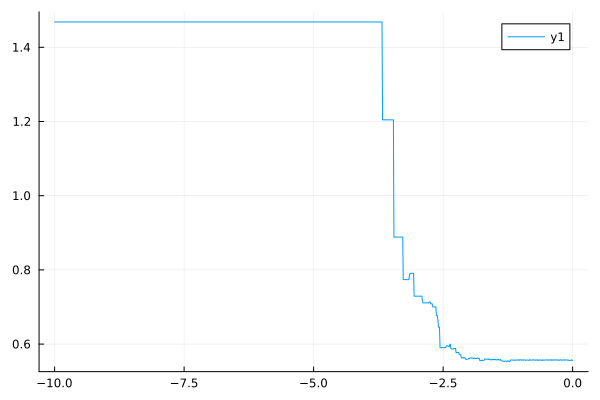

In [18]:
using StatsPlots
plot(log.(thresholds), rmses)

Calculate the out of sample mean squared error of the model. (2 pts)

In [19]:
using MLJDecisionTreeInterface

optimal_alpha = thresholds[argmin(rmses)]
tree_model_prune = DecisionTreeRegressor(post_prune = true, merge_purity_threshold = optimal_alpha)
tree_machine_prune = machine(tree_model_prune, X[train, :], Y[train])
fit!(tree_machine_prune);

[ Info: Training machine(DecisionTreeRegressor(max_depth = -1, …), …).


In [20]:
predictions_prune = predict_mode(tree_machine_prune, X[test, :])
mse_tree = mean((predictions_prune - Y_test).^2)

# Suponiendo que ya tienes calculado el mse_tree
println("Out-of-sample Mean Squared Error of the Regression Tree: ", mse_tree)

Out-of-sample Mean Squared Error of the Regression Tree: 0.3790277535825146


In [21]:
fitted_params(tree_machine_prune)[1]

CAtBat < 1296.0
├─ CHits < 182.0
│  ├─ AtBat < 147.0
│  │  ├─ 5.960816571208978 (0/5)
│  │  └─ CHits < 132.0
│  │     ├─ CRuns < 32.5
│  │     │  ├─ 4.31748811353631 (4/13)
│  │     │  └─ Assists < 71.0
│  │     │     ⋮
│  │     │     
│  │     └─ CRBI < 75.5
│  │        ├─ 4.863263557266372 (0/7)
│  │        └─ 5.161067570091955 (0/6)
│  └─ Errors < 20.0
│     ├─ CRBI < 114.5
│     │  ├─ Runs < 40.0
│     │  │  ├─ 5.526229212842414 (0/7)
│     │  │  └─ Years < 3.5
│     │  │     ⋮
│     │  │     
│     │  └─ 5.61151630439939 (0/9)
│     └─ 4.983246370403156 (0/5)
└─ Walks < 51.5
   ├─ CRuns < 204.5
   │  ├─ CAtBat < 1379.0
   │  │  ├─ 5.9194193099452335 (0/5)
   │  │  └─ 5.397416826019815 (0/6)
   │  └─ Hits < 89.5
   │     ├─ PutOuts < 203.5
   │     │  ├─ Years < 11.5
   │     │  │  ⋮
   │     │  │  
   │     │  └─ 6.378393281118523 (0/9)
   │     └─ CHits < 599.0
   │        ├─ Errors < 6.5
   │        │  ⋮
   │        │  
   │        └─ AtBat < 547.0
   │           ⋮
   │         

- Which model performs better in terms of predictive accuracy? (2 pts) 

##### In terms of power and predictive accuracy, the regression tree that uses cross-validation to find the optimal pruning parameter performs better than using bootsrap regression, which is by observing a lower mean square error . This may be because the sample size used is not small enough to best take advantage of the benefits of bootstrap. As evidenced in Rezazadeh et. al (2019), when the data generation process is unknown and the sample size is larger, regression trees fit better than other predictive methods. Bootstrap is most useful in small samples, where access to more information is limited, which does not seem to be the case with the database used.